In [1]:
import torch
import utils
import dataset
from model import Model
import train

In [2]:
SEED = 1

# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

# For reproducibility
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)

# dataloader arguments - something you'll fetch these from cmdprmt
dataloader_args = dict(shuffle=True, batch_size=128, num_workers=4, pin_memory=True) if cuda else dict(shuffle=True, batch_size=64)

train_loader = dataset.get_train_data_loader(**dataloader_args)
test_loader = dataset.get_test_data_loader(**dataloader_args)

CUDA Available? True
Files already downloaded and verified


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Files already downloaded and verified


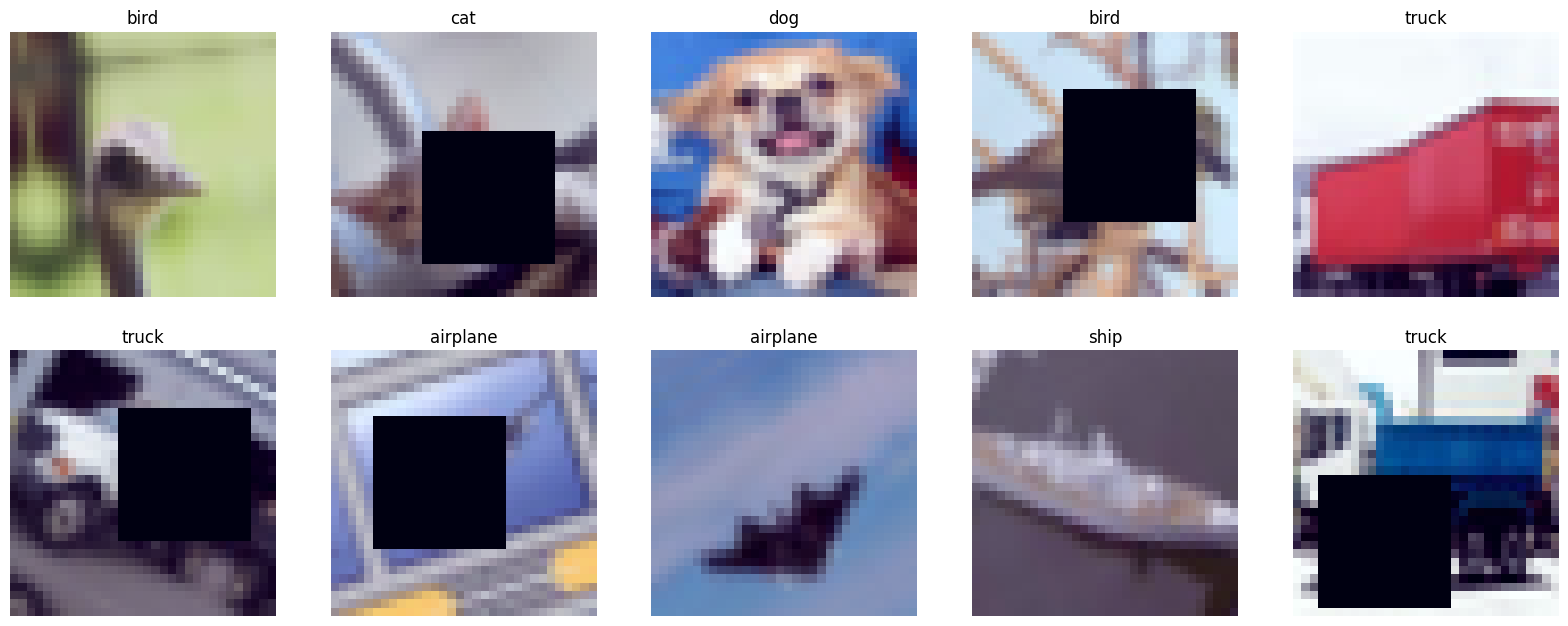

In [3]:
utils.plot_samples(train_loader)

In [4]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = Model().to(device)
summary(model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             432
              ReLU-2           [-1, 16, 32, 32]               0
       BatchNorm2d-3           [-1, 16, 32, 32]              32
           Dropout-4           [-1, 16, 32, 32]               0
            Conv2d-5           [-1, 16, 32, 32]           2,304
              ReLU-6           [-1, 16, 32, 32]               0
       BatchNorm2d-7           [-1, 16, 32, 32]              32
           Dropout-8           [-1, 16, 32, 32]               0
            Conv2d-9           [-1, 16, 30, 30]           2,304
             ReLU-10           [-1, 16, 30, 30]               0
      BatchNorm2d-11           [-1, 16, 30, 30]              32
          Dropout-12           [-1, 16, 30, 30]               0
           Conv2d-13           [-1, 32, 30, 30]           4,608
             ReLU-14           [-1

In [5]:
model = Model().to(device)
optimizer = utils.get_SGD_optimizer(model, lr=0.02, momentum=0.9)
scheduler = utils.get_StepLR_scheduler(optimizer, step_size=150, gamma=0.1)
criterion = utils.get_criterion()
num_epoch = 50

train_losses, train_acc, test_losses, test_acc = train.start_training(
    num_epoch, model, device, train_loader, test_loader, optimizer, criterion,
    scheduler
)

/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Epoch 1


Train: Loss=1.6548 Batch_id=390 Accuracy=34.22: 100%|██████████| 391/391 [00:20<00:00, 19.04it/s]


Test set: Average loss: 1.5073, Accuracy: 4442/10000 (44.42%)

Epoch 2


Train: Loss=1.5091 Batch_id=390 Accuracy=44.45: 100%|██████████| 391/391 [00:17<00:00, 22.42it/s]


Test set: Average loss: 1.2784, Accuracy: 5448/10000 (54.48%)

Epoch 3


Train: Loss=1.4269 Batch_id=390 Accuracy=49.59: 100%|██████████| 391/391 [00:17<00:00, 22.91it/s]


Test set: Average loss: 1.1268, Accuracy: 5912/10000 (59.12%)

Epoch 4


Train: Loss=1.0367 Batch_id=390 Accuracy=53.37: 100%|██████████| 391/391 [00:17<00:00, 22.32it/s]


Test set: Average loss: 1.0305, Accuracy: 6321/10000 (63.21%)

Epoch 5


Train: Loss=1.1120 Batch_id=390 Accuracy=56.39: 100%|██████████| 391/391 [00:17<00:00, 22.81it/s]


Test set: Average loss: 0.9644, Accuracy: 6570/10000 (65.70%)

Epoch 6


Train: Loss=1.1826 Batch_id=390 Accuracy=58.07: 100%|██████████| 391/391 [00:17<00:00, 21.92it/s]


Test set: Average loss: 0.9079, Accuracy: 6817/10000 (68.17%)

Epoch 7


Train: Loss=1.1674 Batch_id=390 Accuracy=60.17: 100%|██████████| 391/391 [00:17<00:00, 22.98it/s]


Test set: Average loss: 0.8390, Accuracy: 7055/10000 (70.55%)

Epoch 8


Train: Loss=0.9945 Batch_id=390 Accuracy=61.18: 100%|██████████| 391/391 [00:17<00:00, 21.80it/s]


Test set: Average loss: 0.8094, Accuracy: 7194/10000 (71.94%)

Epoch 9


Train: Loss=1.0792 Batch_id=390 Accuracy=62.86: 100%|██████████| 391/391 [00:16<00:00, 23.19it/s]


Test set: Average loss: 0.8140, Accuracy: 7190/10000 (71.90%)

Epoch 10


Train: Loss=0.9573 Batch_id=390 Accuracy=63.71: 100%|██████████| 391/391 [00:18<00:00, 21.10it/s]


Test set: Average loss: 0.7445, Accuracy: 7408/10000 (74.08%)

Epoch 11


Train: Loss=1.2978 Batch_id=390 Accuracy=64.17: 100%|██████████| 391/391 [00:16<00:00, 23.20it/s]


Test set: Average loss: 0.7077, Accuracy: 7574/10000 (75.74%)

Epoch 12


Train: Loss=1.0853 Batch_id=390 Accuracy=65.54: 100%|██████████| 391/391 [00:17<00:00, 21.83it/s]


Test set: Average loss: 0.7187, Accuracy: 7566/10000 (75.66%)

Epoch 13


Train: Loss=0.9335 Batch_id=390 Accuracy=65.97: 100%|██████████| 391/391 [00:16<00:00, 23.08it/s]


Test set: Average loss: 0.6934, Accuracy: 7610/10000 (76.10%)

Epoch 14


Train: Loss=1.0455 Batch_id=390 Accuracy=66.48: 100%|██████████| 391/391 [00:17<00:00, 22.12it/s]


Test set: Average loss: 0.6779, Accuracy: 7632/10000 (76.32%)

Epoch 15


Train: Loss=1.0111 Batch_id=390 Accuracy=67.24: 100%|██████████| 391/391 [00:16<00:00, 23.09it/s]


Test set: Average loss: 0.6754, Accuracy: 7665/10000 (76.65%)

Epoch 16


Train: Loss=0.9188 Batch_id=390 Accuracy=67.50: 100%|██████████| 391/391 [00:18<00:00, 21.44it/s]


Test set: Average loss: 0.6274, Accuracy: 7819/10000 (78.19%)

Epoch 17


Train: Loss=1.0016 Batch_id=390 Accuracy=68.13: 100%|██████████| 391/391 [00:16<00:00, 23.06it/s]


Test set: Average loss: 0.6277, Accuracy: 7874/10000 (78.74%)

Epoch 18


Train: Loss=0.9930 Batch_id=390 Accuracy=68.93: 100%|██████████| 391/391 [00:17<00:00, 22.63it/s]


Test set: Average loss: 0.6387, Accuracy: 7816/10000 (78.16%)

Epoch 19


Train: Loss=0.9653 Batch_id=390 Accuracy=68.87: 100%|██████████| 391/391 [00:17<00:00, 22.73it/s]


Test set: Average loss: 0.5988, Accuracy: 7947/10000 (79.47%)

Epoch 20


Train: Loss=1.0073 Batch_id=390 Accuracy=69.30: 100%|██████████| 391/391 [00:17<00:00, 22.33it/s]


Test set: Average loss: 0.5844, Accuracy: 7989/10000 (79.89%)

Epoch 21


Train: Loss=0.9455 Batch_id=390 Accuracy=69.59: 100%|██████████| 391/391 [00:17<00:00, 22.81it/s]


Test set: Average loss: 0.6058, Accuracy: 7929/10000 (79.29%)

Epoch 22


Train: Loss=0.9990 Batch_id=390 Accuracy=69.77: 100%|██████████| 391/391 [00:18<00:00, 20.94it/s]


Test set: Average loss: 0.5898, Accuracy: 7989/10000 (79.89%)

Epoch 23


Train: Loss=0.8508 Batch_id=390 Accuracy=70.48: 100%|██████████| 391/391 [00:17<00:00, 22.70it/s]


Test set: Average loss: 0.5847, Accuracy: 8021/10000 (80.21%)

Epoch 24


Train: Loss=0.7072 Batch_id=390 Accuracy=70.48: 100%|██████████| 391/391 [00:17<00:00, 22.09it/s]


Test set: Average loss: 0.5664, Accuracy: 8049/10000 (80.49%)

Epoch 25


Train: Loss=0.8301 Batch_id=390 Accuracy=70.79: 100%|██████████| 391/391 [00:17<00:00, 22.42it/s]


Test set: Average loss: 0.5654, Accuracy: 8082/10000 (80.82%)

Epoch 26


Train: Loss=0.6301 Batch_id=390 Accuracy=70.93: 100%|██████████| 391/391 [00:17<00:00, 22.17it/s]


Test set: Average loss: 0.5611, Accuracy: 8069/10000 (80.69%)

Epoch 27


Train: Loss=0.7438 Batch_id=390 Accuracy=71.72: 100%|██████████| 391/391 [00:17<00:00, 22.41it/s]


Test set: Average loss: 0.5411, Accuracy: 8163/10000 (81.63%)

Epoch 28


Train: Loss=1.0077 Batch_id=390 Accuracy=71.70: 100%|██████████| 391/391 [00:18<00:00, 21.21it/s]


Test set: Average loss: 0.5336, Accuracy: 8170/10000 (81.70%)

Epoch 29


Train: Loss=0.8513 Batch_id=390 Accuracy=71.64: 100%|██████████| 391/391 [00:17<00:00, 22.44it/s]


Test set: Average loss: 0.5314, Accuracy: 8209/10000 (82.09%)

Epoch 30


Train: Loss=0.8292 Batch_id=390 Accuracy=72.05: 100%|██████████| 391/391 [00:17<00:00, 22.54it/s]


Test set: Average loss: 0.5274, Accuracy: 8198/10000 (81.98%)

Epoch 31


Train: Loss=0.8463 Batch_id=390 Accuracy=71.97: 100%|██████████| 391/391 [00:17<00:00, 22.91it/s]


Test set: Average loss: 0.5216, Accuracy: 8228/10000 (82.28%)

Epoch 32


Train: Loss=0.7464 Batch_id=390 Accuracy=72.49: 100%|██████████| 391/391 [00:17<00:00, 22.05it/s]


Test set: Average loss: 0.5156, Accuracy: 8218/10000 (82.18%)

Epoch 33


Train: Loss=0.9696 Batch_id=390 Accuracy=72.39: 100%|██████████| 391/391 [00:17<00:00, 22.40it/s]


Test set: Average loss: 0.5269, Accuracy: 8199/10000 (81.99%)

Epoch 34


Train: Loss=0.7304 Batch_id=390 Accuracy=72.95: 100%|██████████| 391/391 [00:19<00:00, 20.43it/s]


Test set: Average loss: 0.5149, Accuracy: 8261/10000 (82.61%)

Epoch 35


Train: Loss=0.8937 Batch_id=390 Accuracy=73.04: 100%|██████████| 391/391 [00:17<00:00, 22.38it/s]


Test set: Average loss: 0.4862, Accuracy: 8366/10000 (83.66%)

Epoch 36


Train: Loss=0.7677 Batch_id=390 Accuracy=73.07: 100%|██████████| 391/391 [00:18<00:00, 21.43it/s]


Test set: Average loss: 0.4915, Accuracy: 8312/10000 (83.12%)

Epoch 37


Train: Loss=0.6255 Batch_id=390 Accuracy=73.38: 100%|██████████| 391/391 [00:17<00:00, 22.93it/s]


Test set: Average loss: 0.5017, Accuracy: 8303/10000 (83.03%)

Epoch 38


Train: Loss=0.7575 Batch_id=390 Accuracy=73.37: 100%|██████████| 391/391 [00:18<00:00, 21.63it/s]


Test set: Average loss: 0.4958, Accuracy: 8283/10000 (82.83%)

Epoch 39


Train: Loss=0.6788 Batch_id=390 Accuracy=73.51: 100%|██████████| 391/391 [00:17<00:00, 22.47it/s]


Test set: Average loss: 0.4905, Accuracy: 8322/10000 (83.22%)

Epoch 40


Train: Loss=0.7440 Batch_id=390 Accuracy=73.87: 100%|██████████| 391/391 [00:18<00:00, 21.53it/s]


Test set: Average loss: 0.4859, Accuracy: 8352/10000 (83.52%)

Epoch 41


Train: Loss=0.8027 Batch_id=390 Accuracy=73.84: 100%|██████████| 391/391 [00:17<00:00, 22.33it/s]


Test set: Average loss: 0.4861, Accuracy: 8354/10000 (83.54%)

Epoch 42


Train: Loss=0.8620 Batch_id=390 Accuracy=73.88: 100%|██████████| 391/391 [00:18<00:00, 21.35it/s]


Test set: Average loss: 0.4635, Accuracy: 8429/10000 (84.29%)

Epoch 43


Train: Loss=0.8501 Batch_id=390 Accuracy=74.25: 100%|██████████| 391/391 [00:17<00:00, 22.66it/s]


Test set: Average loss: 0.4739, Accuracy: 8364/10000 (83.64%)

Epoch 44


Train: Loss=0.7002 Batch_id=390 Accuracy=74.27: 100%|██████████| 391/391 [00:18<00:00, 21.34it/s]


Test set: Average loss: 0.4585, Accuracy: 8426/10000 (84.26%)

Epoch 45


Train: Loss=0.9156 Batch_id=390 Accuracy=74.27: 100%|██████████| 391/391 [00:18<00:00, 21.13it/s]


Test set: Average loss: 0.4697, Accuracy: 8386/10000 (83.86%)

Epoch 46


Train: Loss=0.6463 Batch_id=390 Accuracy=74.51: 100%|██████████| 391/391 [00:18<00:00, 21.36it/s]


Test set: Average loss: 0.4565, Accuracy: 8460/10000 (84.60%)

Epoch 47


Train: Loss=0.6693 Batch_id=390 Accuracy=74.41: 100%|██████████| 391/391 [00:17<00:00, 22.65it/s]


Test set: Average loss: 0.4608, Accuracy: 8441/10000 (84.41%)

Epoch 48


Train: Loss=0.6569 Batch_id=390 Accuracy=75.01: 100%|██████████| 391/391 [00:18<00:00, 21.19it/s]


Test set: Average loss: 0.4610, Accuracy: 8433/10000 (84.33%)

Epoch 49


Train: Loss=0.6658 Batch_id=390 Accuracy=74.79: 100%|██████████| 391/391 [00:17<00:00, 21.83it/s]


Test set: Average loss: 0.4591, Accuracy: 8407/10000 (84.07%)

Epoch 50


Train: Loss=0.5489 Batch_id=390 Accuracy=74.91: 100%|██████████| 391/391 [00:19<00:00, 20.07it/s]


Test set: Average loss: 0.4467, Accuracy: 8476/10000 (84.76%)



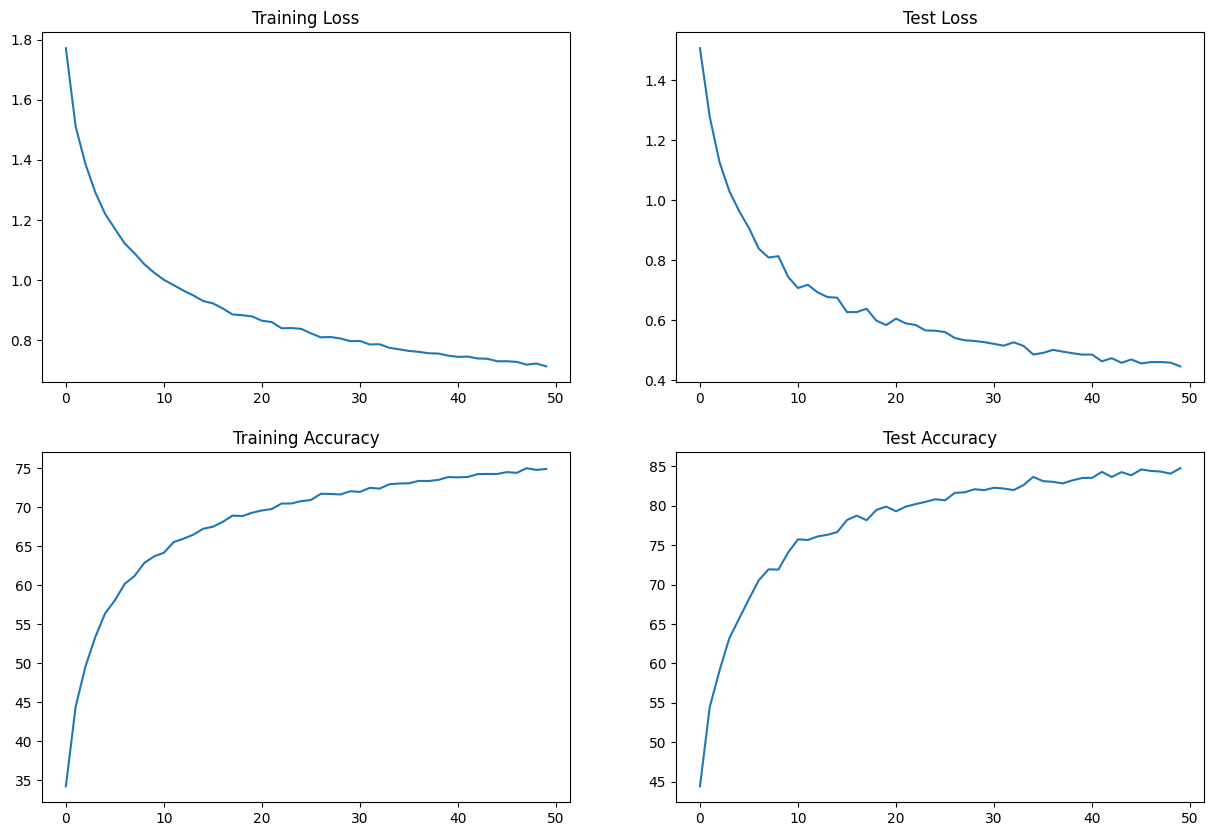

In [6]:
utils.plot_accuracy_loss_graphs(train_losses, train_acc, test_losses, test_acc)

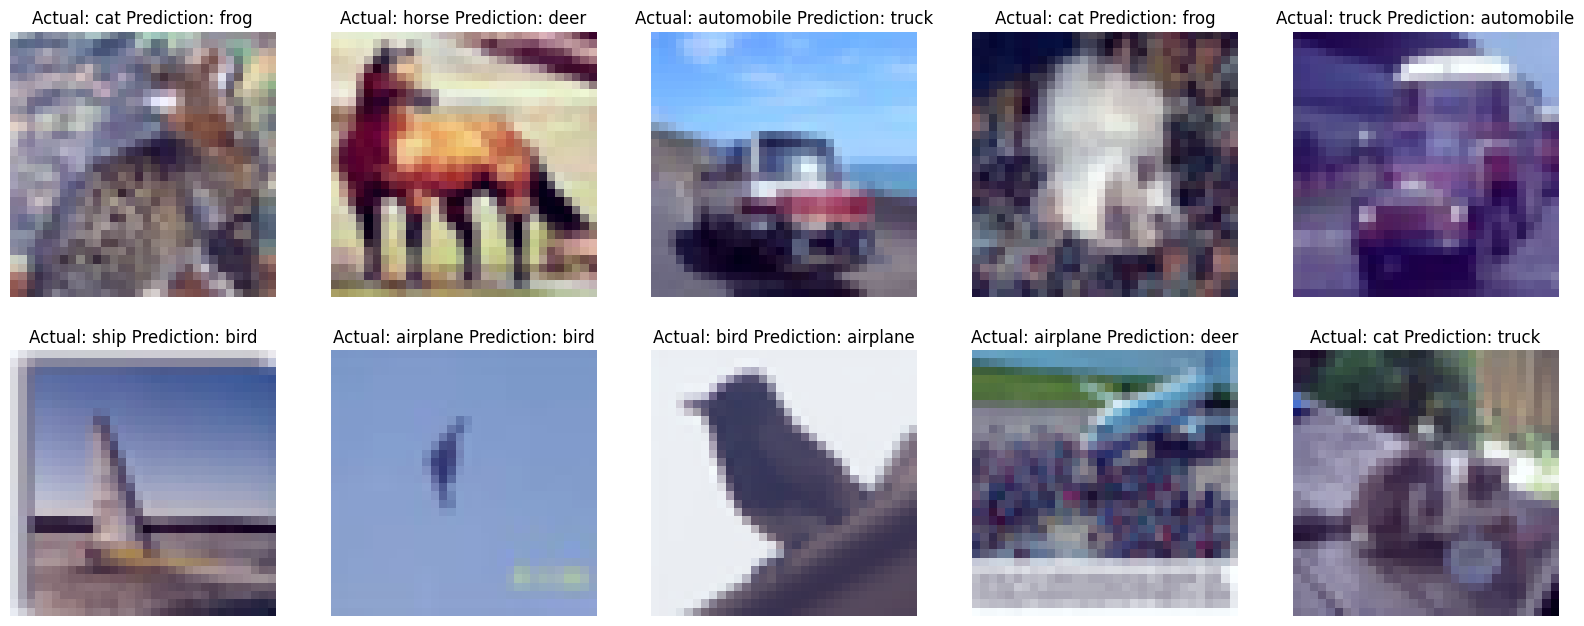

In [7]:
utils.plot_missclassified_images(device, model, test_loader)